# LIBRARIES

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

try:
    df = pd.read_csv('/kaggle/input/dataset-03/reviews.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/kaggle/input/dataset-03/reviews.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/kaggle/input/dataset-03/reviews.csv', encoding='ISO-8859-1')

In [2]:
df.head()

,review,feedback
0,and just when you thought joblo was getting a ...,0
1,a life less ordinary ( r ) while the extremely...,0
2,the lives of older people in the twilight of t...,0
3,melvin udall is a heartless man .he spends his...,1
4,conventional wisdom among collectibles retaile...,0


In [3]:
df.shape

(2000, 2)

In [4]:
print(df['feedback'].value_counts())

feedback
0    1000
1    1000
Name: count, dtype: int64


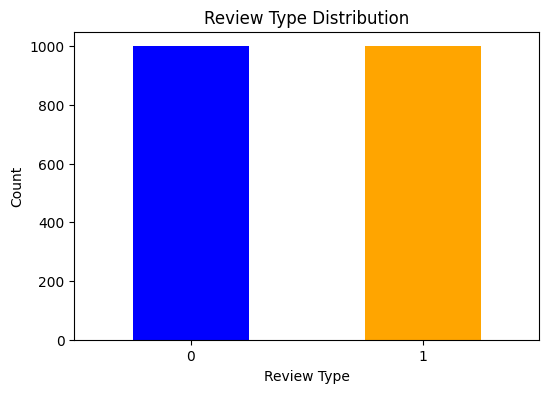

In [5]:
plt.figure(figsize=(6, 4))
df['feedback'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nSummary statistics of comment length:")
print(df['review_length'].describe())


Summary statistics of comment length:
count    2000.00000
mean      714.67150
std       316.48205
min        17.00000
25%       503.00000
50%       667.00000
75%       865.00000
max      2620.00000
Name: review_length, dtype: float64


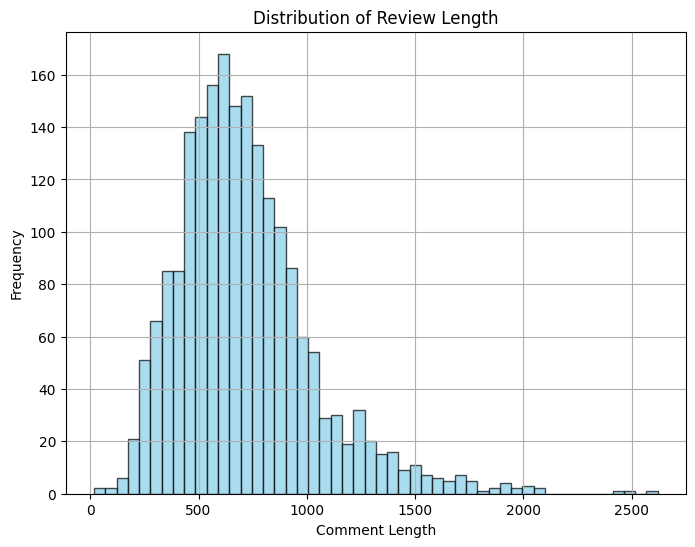

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
all_comments = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

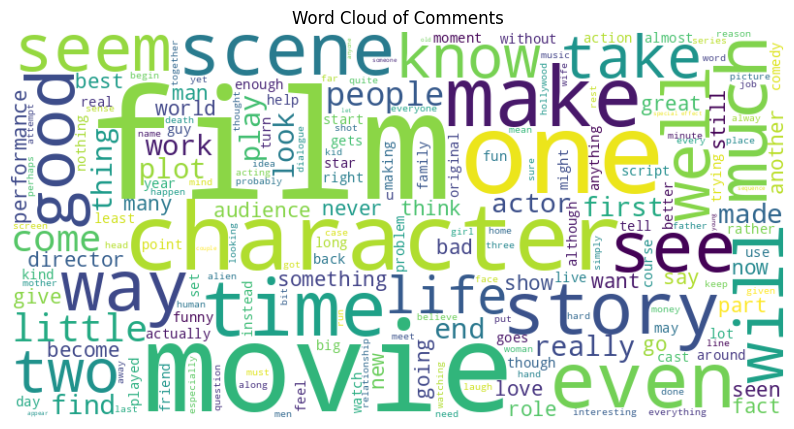

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Comments')
plt.axis('off')
plt.show()

In [10]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

X = df['review']
y = df['feedback']

# Logistic Regression

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
lg_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range = (1,2))

X_tfidf = lg_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
features = SelectKBest(chi2, k=k)
X_selected = features.fit_transform(X_tfidf, y)

# Define Logistic Regression model
lgmodel = LogisticRegression(solver='saga', max_iter=1000)

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lgmodel.fit(X_train, y_train)

    y_pred = lgmodel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.935, 0.935, 0.95, 0.905, 0.9, 0.92, 0.955, 0.915, 0.965, 0.945]
Mean accuracy: 0.9325000000000001


In [12]:
# query = input("Enter your comment to predict its class: ")

# tokens = features.transform(lg_tf_idf.transform([query]))
# prediction = lgmodel.predict(tokens)

# if prediction == 1:
#     print("Positive")
# else:
#     print("Negative")

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.92      0.97      0.95       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200

Confusion Matrix:
[[92  8]
 [ 3 97]]


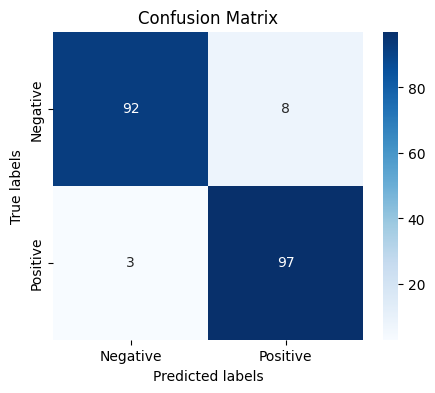

In [14]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-rbf

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.svm import SVC

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
svm_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range = (1,2))

X_tfidf = svm_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# Define Logistic Regression model
svm_model = SVC(kernel='rbf')

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.97, 0.95, 0.965, 0.955, 0.955, 0.94, 0.99, 0.955, 0.98, 0.98]
Mean accuracy: 0.9640000000000001


In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
[[98  2]
 [ 2 98]]


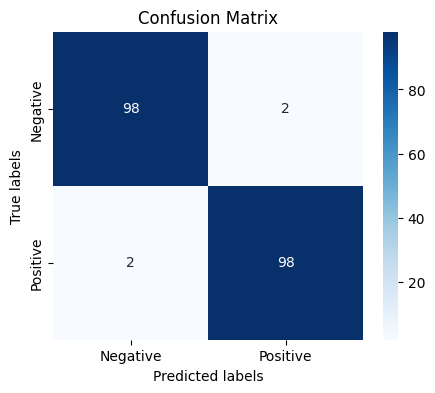

In [17]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-linear

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.svm import SVC

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
svm_linear_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range = (1,2))

X_tfidf = svm_linear_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# Define Logistic Regression model
svm_linear_model = SVC(kernel='linear')


# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_linear_model.fit(X_train, y_train)

    y_pred = svm_linear_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.935, 0.935, 0.955, 0.905, 0.905, 0.92, 0.97, 0.92, 0.96, 0.935]
Mean accuracy: 0.9340000000000002


In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       100
           1       0.91      0.97      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200

Confusion Matrix:
[[90 10]
 [ 3 97]]


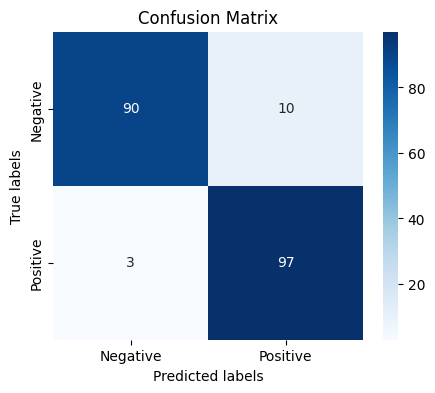

In [20]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# KNN (n=3)

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
knn_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range = (1,2))

X_tfidf = knn_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# Define Logistic Regression model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.67, 0.695, 0.615, 0.665, 0.615, 0.665, 0.68, 0.645, 0.66, 0.67]
Mean accuracy: 0.658


In [22]:
# from sklearn.neighbors import KNeighborsClassifier

# X = df['review']
# y = df['feedback']

# tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))

# X_tfidf = tf_idf.fit_transform(X)

# k = 10000  # Choose the number of features you want to select
# X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# model = KNeighborsClassifier(n_neighbors=3)

# skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
# accuracies = []

# for train_index, test_index in skf.split(X_tfidf, y):
#     X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     model.fit(X_train, y_train)
    
#     y_pred = model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)

# print("Accuracy scores for each fold:", accuracies)
# print("Mean accuracy:", np.mean(accuracies))

In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.45      0.58       100
           1       0.62      0.89      0.73       100

    accuracy                           0.67       200
   macro avg       0.71      0.67      0.65       200
weighted avg       0.71      0.67      0.65       200

Confusion Matrix:
[[45 55]
 [11 89]]


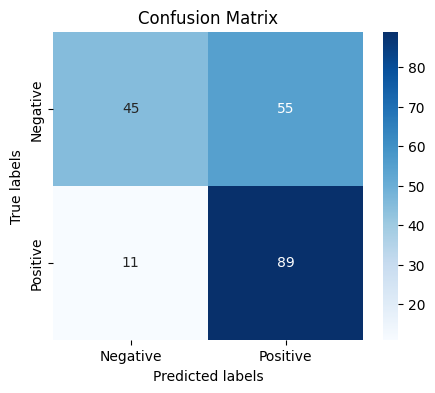

In [24]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# DECISION TREE

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
dt_tf_idf = TfidfVectorizer(sublinear_tf=True, stop_words = 'english', ngram_range = (1,2))

X_tfidf = dt_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# Define Logistic Regression model
dt_model = DecisionTreeClassifier()

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.65, 0.685, 0.66, 0.71, 0.635, 0.68, 0.685, 0.68, 0.68, 0.67]
Mean accuracy: 0.6735


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       100
           1       0.65      0.74      0.69       100

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

Confusion Matrix:
[[60 40]
 [26 74]]


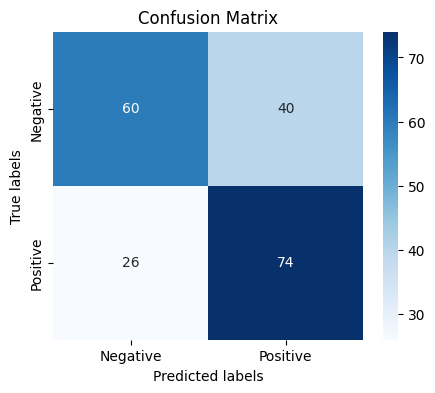

In [27]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# RANDOM FOREST CLASSIFIER

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
rf_tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range = (1,2))

X_tfidf = rf_tf_idf.fit_transform(X)

k = 10000  # Choose the number of features you want to select
X_selected = SelectKBest(chi2, k=k).fit_transform(X_tfidf, y)

# Define Logistic Regression model
rf_model = RandomForestClassifier()

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.85, 0.865, 0.92, 0.805, 0.85, 0.845, 0.9, 0.855, 0.875, 0.865]
Mean accuracy: 0.8629999999999999


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.87      0.86      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

Confusion Matrix:
[[87 13]
 [14 86]]


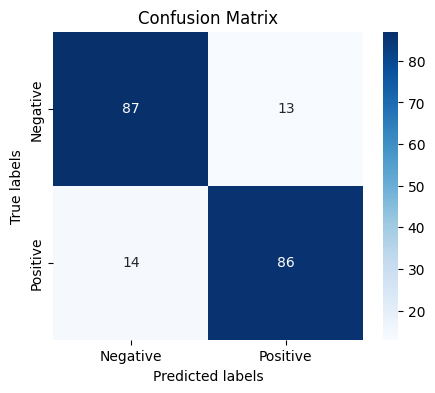

In [30]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# BERNOULLI-NB

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# Assuming X and y are your features and target variable respectively
# Define TF-IDF vectorizer
bnb_tf_idf = TfidfVectorizer(sublinear_tf=True, stop_words='english',ngram_range = (1,2))
bnb_tf_idf.fit(X)
X_tfidf = bnb_tf_idf.transform(X)

k = 10000  # Choose the number of features you want to select
bnb_dt_features =SelectKBest(chi2, k=k) 
X_selected = bnb_dt_features.fit_transform(X_tfidf, y)

# Define Logistic Regression model
bnb_model = BernoulliNB()

# Define cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# Cross-validation loop
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    bnb_model.fit(X_train, y_train)

    y_pred = bnb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Accuracy scores for each fold: [0.97, 0.965, 0.97, 0.95, 0.96, 0.955, 0.985, 0.97, 0.98, 0.99]
Mean accuracy: 0.9695


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[99  1]
 [ 1 99]]


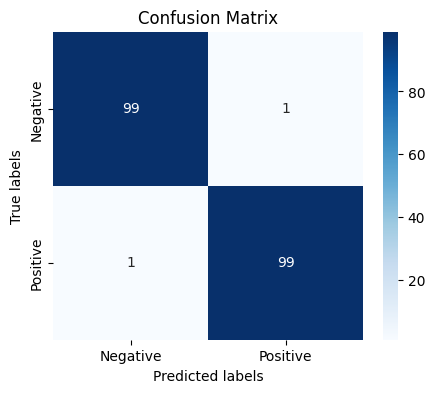

In [39]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
query_comment = input("Enter your comment to predict its class: ")

print("Choose the algorithm for prediction: ")
print("1. K Nearest Neighbours")
print("2. SVC Linear")
print("3. SVC Rbf")
print("4. Linear Regression")
print("5. Random Forest")
print("6. Bernoulli Naive Bayes")
print("7. Decision Tree")

prediction = -1
option = int(input())

if option == 1:
    token = features.transform(knn_tf_idf.transform([query_comment]))
    prediction = knn_model.predict(token)
elif option == 2:
    token = features.transform(svm_linear_tf_idf.transform([query_comment]))
    prediction = svm_linear_model.predict(token)
elif option == 3:
    token = features.transform(svm_tf_idf.transform([query_comment]))
    prediction = svm_model.predict(token)
elif option == 4:
    token = features.transform(lg_tf_idf.transform([query_comment]))
    prediction = lgmodel.predict(token)
elif option == 5:
    token = features.transform(rf_tf_idf.transform([query_comment]))
    prediction = rf_model.predict(token)
elif option == 6:
    token = bnb_dt_features.transform(bnb_tf_idf.transform([query_comment]))
    prediction = bnb_model.predict(token)
elif option == 7:
    token = bnb_dt_features.transform(dt_tf_idf.transform([query_comment]))
    prediction = dt_model.predict(token)
else:
    print("Enter correct option!")
    exit()
    
if prediction == 1:
    print("Positive")
else:
    print("Negative")

Enter your comment to predict its class:  good movie


Choose the algorithm for prediction: 
1. K Nearest Neighbours
2. SVC Linear
3. SVC Rbf
4. Linear Regression
5. Random Forest
6. Bernoulli Naive Bayes
7. Decision Tree


 7


Positive
